### Preparing a raw Phoenix Grid installation ###

This is needed for making custom StarKit grids - not suitable for most users. 

You first need to navigate to the Phoenix folder that contains the grid ('PHOENIX-ACES-AGSS-COND-2011')

In [2]:
from starkit.gridkit.io.phoenix import make_grid_info
from starkit.gridkit.io.phoenix import PhoenixProcessGrid
from starkit.gridkit import load_grid
import pandas as pd
from astropy import units as u, constants as const
from astropy.io import fits
import numpy as np
import uuid

### Create the indicies ###

In [4]:
meta = pd.read_hdf('phoenix_grid_info.h5', 'meta')
raw_index = pd.read_hdf('phoenix_grid_info.h5', 'index')
wavelength = pd.read_hdf('phoenix_grid_info.h5', 'wavelength')[0].values * u.Unit(meta['wavelength_unit'])

In [6]:
sun_flux = fits.getdata(raw_index.loc[487]['filename']) * u.erg/u.s/u.cm**2/u.cm
sun_header = fits.getheader(raw_index.loc[487]['filename'])
sun_lum_dens = sun_flux * (4 * np.pi * (sun_header['PHXREFF'] * u.cm)**2)


In [47]:
(np.trapz(sun_lum_dens, wavelength).to('W') / const.L_sun).to(1)

<Quantity 0.8778772740616984>

In [ ]:
index_filter = (raw_index.teff.between(2000, 20000) &
 raw_index.logg.between(-1, 5) &
 raw_index.mh.between(-1.5, 0.5) &
 (raw_index.alpha == 0.0))

In [7]:
index_filter = (raw_index.teff.between(2000, 20000) &
 raw_index.logg.between(-1, 5) &
 raw_index.mh.between(-1.5, 0.5) &
 (raw_index.alpha == 0.0))

new_index = raw_index.loc[index_filter]

In [8]:
pgrid = PhoenixProcessGrid(new_index, wavelength, meta, 
                           wavelength_start=2000*u.angstrom, 
                           wavelength_stop=9000*u.angstrom, R=10000,
                          R_sampling=4)

In [ ]:
pgrid.to_hdf('phoenix_working_v1_fixed_units.h5', overwrite=True)

 46% (1801 of 3833) |#########            | Elapsed Time: 3:43:20 ETA:  3:28:26

In [15]:
phoenix_grid = load_grid('phoenix_working_v1_fixed_units.h5')

starkit.gridkit.base - INFO - Reading index
starkit.gridkit.base - INFO - Discovered columns teff, logg, mh
starkit.gridkit.base - INFO - Reading Fluxes
starkit.gridkit.base - INFO - Fluxes shape (3833, 60164)
starkit.gridkit.base - INFO - Initializing spec grid
starkit.gridkit.base - INFO - Setting grid extent


In [21]:
mkdir ../../../deepskies/spectral_training

In [26]:
phoenix_grid.logg = 4.5
phoenix_grid.mh = 0.0

all_teffs = np.random.uniform(2300, 11000, 10000)
for i, teff in enumerate(all_teffs):
    if i%100 == 0:
        print i
    phoenix_grid.teff = teff
    wave, flux = phoenix_grid()
    np.savetxt('../../../deepskies/spectral_training/spec{0:.0f}.txt'.format(teff), zip(wave.value, flux))

0
100
200
300
400
500
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


array([ 9188.63163075,  2768.0957727 ,  2777.76389744, ...,  9283.05043185,
        7074.69390644,  3407.74637533])

In [11]:
phoenix_grid.teff = 5780.
phoenix_grid.logg = 4.4
phoenix_grid.mh = 0.0o

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


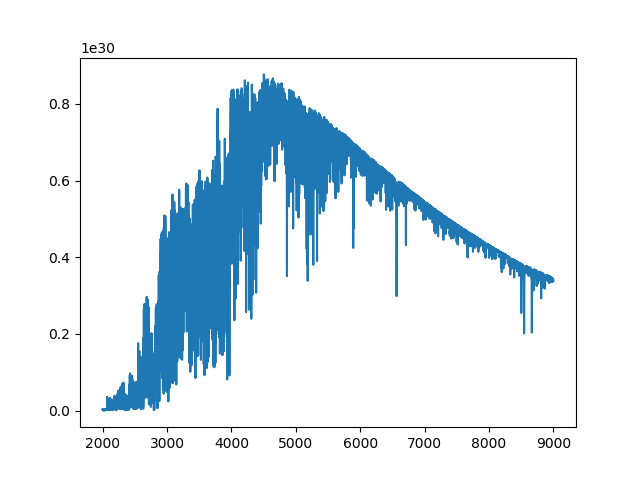

In [12]:
%pylab notebook

w, f = phoenix_grid()

plot(w, f)

In [13]:
flux = fits.getdata('PHOENIX-ACES-AGSS-COND-2011/Z+0.5/lte02300-0.00+0.5.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits')

'6b5d81d3-7133-4ed0-bfdb-a6d40af790b2'

Populating the interactive namespace from numpy and matplotlib


/Users/wkerzend/anaconda3/envs/starkit/lib/python2.7/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/wkerzend/.matplotlib/stylelib/talk_default.mplstyle", line #33
  (fname, cnt))
/Users/wkerzend/anaconda3/envs/starkit/lib/python2.7/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/wkerzend/.matplotlib/stylelib/talk_default.mplstyle", line #39
  (fname, cnt))
/Users/wkerzend/anaconda3/envs/starkit/lib/python2.7/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/wkerzend/.matplotlib/stylelib/talk_default.mplstyle", line #40
  (fname, cnt))


<IPython.core.display.Javascript object>


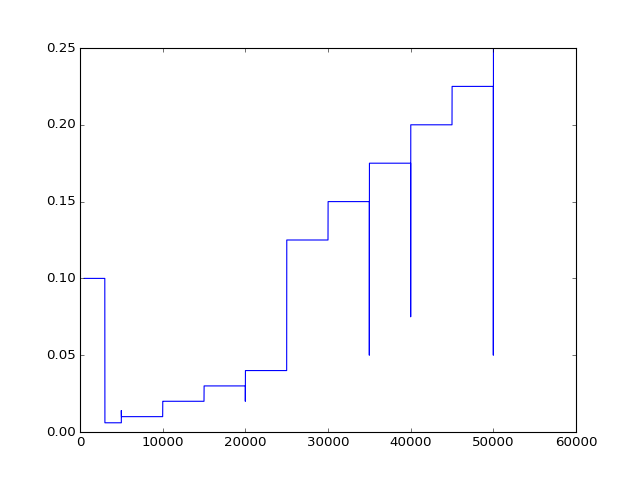

In [10]:
%pylab notebook

plot(wavelength[1:], np.diff(wavelength))

In [8]:
fits.open(raw_index.filename[0])

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1225a9b90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1250d9550>]